[67.44381845090562, 62.832963416587226, 60.229474459485225, 59.70550558722593, 59.338018400381316]


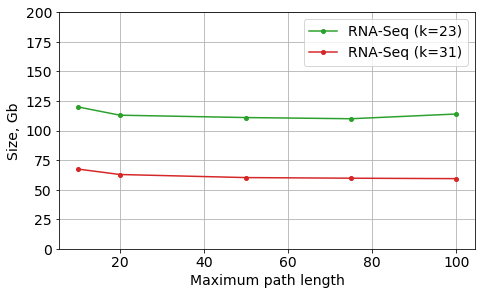

In [4]:
# raw data in /cluster/work/grlab/projects/metagenome/data/mantis/max*

%matplotlib inline

import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib as mpl
import sys

width = 3.487 * 1.5 * 1.3
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

x=[10,20,50,75,100]
gib=1000*1.049e+6
mantis_k23=[120,113, 111,110,114] # size in GB
mantis_k23_unopt=[193,193,193,193,192]

row_diff_subset=[6.1, 5.5, 5.1, 5.1, 5.0] # size in GB
row_diff_subset_unopt = [9.7, 9.4, 9.1, 9.1, 8.8] # TODO: 8.8 needs checking

mantis_k31_row_diff_unopt=[122086296264, 120425366199, 119421528893, 119168112001, 114836383382] # last needs checking
mantis_k31_row_diff_unopt[:] = [x / gib for x in mantis_k31_row_diff_unopt]
mantis_k31_row_diff_opt=[70748565555, 65911778624, 63180718708, 62631075361, 62245581302]
mantis_k31_row_diff_opt[:] = [x / gib for x in mantis_k31_row_diff_opt]
print(mantis_k31_row_diff_opt)
refseq_row_diff=[1500,861,447,351,302] # in MB


lines = ax.plot(x,
                mantis_k23,
                marker='o', ms=4, label='RNA-Seq (k=23)', linestyle='-', color='tab:green')
#lines = ax.plot(x,
#                mantis_k23_unopt,
#                marker='o', ms=4, label='RNA-Seq k=23', linestyle='-.', color='tab:green')

lines = ax.plot(x,
                mantis_k31_row_diff_opt,
                marker='o', ms=4, label='RNA-Seq (k=31)', linestyle='-', color='tab:red')
#lines = ax.plot(x,
#                mantis_k31_row_diff_unopt,
#                marker='o', ms=4, label='RNA-Seq k=31', linestyle='-.', color='tab:red')



color = 'tab:red'
ax.set_xlabel('Maximum path length', fontsize=14)
ax.set_ylabel('Size, Gb', fontsize=14)
ax.set_ylim([0, 200])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig('/tmp/size_vs_path_length.pdf', format='pdf', bbox_inches='tight')

plt.show()

[1455.8806472831268, 813.9988741658723, 398.9480324118208, 302.19554146806485, 252.92636987607244]


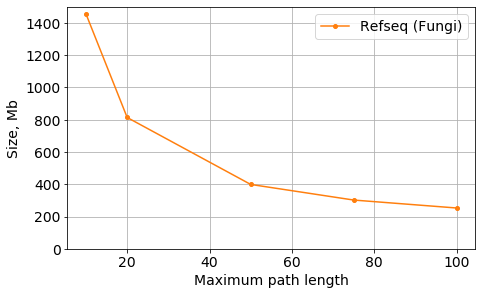

In [3]:
%matplotlib inline

import glob
import os
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import sys

width = 3.487 * 1.5 * 1.3
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


x=[10,20,50,75,100]
row_diff=[1500,861,447,351,302]
row_diff_opt=[1527218799, 853884819,418496486,317003123,265319762]
mib=1.049e+6
row_diff_opt[:] = [x / mib for x in row_diff_opt]
print(row_diff_opt)
 
#lines = ax.plot(x,
#                row_diff,
#                marker='o', ms=4, label='RowDiff', linestyle='-.', color='tab:orange')

lines = ax.plot(x,
                row_diff_opt,
                marker='o', ms=4, label='Refseq (Fungi)', linestyle='-', color='tab:orange')
color = 'tab:red'
ax.set_xlabel('Maximum path length', fontsize=14)
ax.set_ylabel('Size, Mb', fontsize=14)
ax.set_ylim([0, 1500])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='best', fontsize=14)


plt.tight_layout()
plt.savefig('/tmp/size_vs_path_length_refseq_fungi.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Refseq subsets size unoptizmized
refseq_col_compressed_size_b = [986735239, 1993771995, 3669608531, 3788917621, 3934581645, 3978602795, 3984028504, 4426745208, 4880516888, 6905613939, 11215510690]

refseq_col_compressed_size_mb = [v/(1024*1024) for v in refseq_col_compressed_size_b]


refseq_unoptimized_size_mb = [23, 46, 92, 98, 104, 109, 113, 127, 142, 191]
refseq_optimized_size_mb = [23, 46, 89, 95, 101, 106, 110, 123, 137, 183, 287]

compression_factor = [i/j for i, j in zip(refseq_col_compressed_size_mb, refseq_optimized_size_mb)]

width = 3.487 * 1.5 * 1.3
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes
ax.set_ylim([0, 45])

x=list(range(1000, 10001, 1000)) + [12561]
y=list(range(1000, 10001, 1000)) + [12561]
 
#lines = ax.plot(x,
#                refseq_optimized_size_mb,
#                marker='o', ms=4, label='Sparsified Columns', linestyle='-', color='tab:green')
#lines = ax.plot(x, y,
#                marker='o', ms=4, label='RowDiff', linestyle='-', color='tab:gray')
#lines = ax.plot(x, refseq_col_compressed_size_mb,
#                marker='o', ms=4, label='Original Columns', linestyle='-', color='tab:gray')

lines = ax.plot(x, compression_factor,
                marker='o', ms=4, label='Refseq Fungi', linestyle='-', color='tab:green')


color = 'tab:red'
ax.set_xlabel('Subset size')
ax.set_ylabel('Compression ratio')
#ax.set_ylim([0, 1500])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='best', fontsize=8)

plt.tight_layout()
plt.savefig('/tmp/refseq_subsets_ratio.pdf', format='pdf', bbox_inches='tight')

plt.show()
#=======================================================================

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes
ax.set_xlabel('Subset size', fontsize=12)
ax.set_ylabel('Size, MiB', fontsize=12)
ax.grid(True)
 
lines = ax.plot(x,
                refseq_optimized_size_mb,
                marker='o', ms=4, label='Sparsified Columns', linestyle='-', color='tab:green')
#lines = ax.plot(x, y,
#                marker='o', ms=4, label='RowDiff', linestyle='-', color='tab:gray')
lines = ax.plot(x, refseq_col_compressed_size_mb,
                marker='o', ms=4, label='Original Columns', linestyle='-', color='tab:gray')
ax.legend(loc='best', fontsize=8)

plt.tight_layout()
plt.savefig('/tmp/refseq_subsets_size.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Refseq subsets size unoptizmized
refseq_col_compressed_size_b = [986735239, 1993771995, 3669608531, 3788917621, 3934581645, 3978602795, 3984028504, 4426745208, 4880516888, 6905613939, 11215510690]

refseq_col_compressed_size_mb = [v/(1024*1024) for v in refseq_col_compressed_size_b]


refseq_unoptimized_size_mb = [23, 46, 92, 98, 104, 109, 113, 127, 142, 191]
refseq_optimized_size_mb = [23, 46, 89, 95, 101, 106, 110, 123, 137, 183, 287]

compression_factor = [i/j for i, j in zip(refseq_col_compressed_size_mb, refseq_optimized_size_mb)]

width = 3.487 * 1.5 * 1.3
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes
ax.set_xlim([19, 31])

x=[19,23,27,31]
y=[11000.0/1900, 11000.0/398, 11000.0/314, 11000.0/287]
 
lines = ax.plot(x, y,
                marker='o', ms=4, linestyle='-', color='tab:green')


color = 'tab:red'
ax.set_xlabel('k-mer size')
ax.set_ylabel('Compression ratio')
ax.grid(True)
ax.legend(loc='best', fontsize=8)

plt.tight_layout()
plt.savefig('/tmp/refseq_k_ratio.pdf', format='pdf', bbox_inches='tight')

plt.show()
